# Method 2

In [1]:
# https://github.com/lucas-de-sa/national-anthems-clustering

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# pip install wordcloud

In [4]:
# Data Structures
import numpy  as np
import pandas as pd
# import geopandas as gpd
import json

# Corpus Processing
import re
import nltk.corpus
from unidecode                        import unidecode
from nltk.tokenize                    import word_tokenize
from nltk                             import SnowballStemmer
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.preprocessing            import normalize

# K-Means
from sklearn import cluster

# Visualization and Analysis
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

# Map Viz
import folium
#import branca.colormap as cm
from branca.element import Figure

In [5]:
# import sys
# 'geopandas' in sys.modules

In [6]:
data = pd.read_csv('./datasets/200_dataset_0811_NMF.csv',nrows = 35000)
data

,Sent_id,No.,mongodb_id,content,recommend,sent_tokens,preprocessed_reviews_nm,correct
0,1,50,5f7db8d335b79a1eb9d208e2,\n\t\t\t\t\t\t\t\tYou literally do not have en...,True,You literally do not have enough time in your ...,"['literally', 'enough', 'time', 'life', 'explo...","['literally', 'enough', 'time', 'life', 'explo..."
1,2,50,5f7db8d335b79a1eb9d208e2,\n\t\t\t\t\t\t\t\tYou literally do not have en...,True,"So, may as well make use of the time you've go...","['make', 'use', 'time', 'get', 'see']","['make', 'use', 'time', 'get', 'see']"
2,3,68967,5f76e99dfbffba7b18adb94e,Game ran like crap at first but a patch less t...,True,Game ran like crap at first but a patch less t...,"['ran', 'like', 'crap', 'first', 'patch', 'les...","['ran', 'like', 'crap', 'first', 'patch', 'les..."
3,4,68967,5f76e99dfbffba7b18adb94e,Game ran like crap at first but a patch less t...,True,No other developer can deliver patches that qu...,"['no', 'developer', 'deliver', 'patch', 'quick...","['no', 'developer', 'deliver', 'patch', 'quick..."
4,5,68967,5f76e99dfbffba7b18adb94e,Game ran like crap at first but a patch less t...,True,"As far as the game goes, after almost 20 hours...","['far', 'go', 'almost', 'number_hour', 'still'...","['far', 'gb', 'almost', 'number_hour', 'still'..."
...,...,...,...,...,...,...,...,...
1289,1290,93450,5f6e3571e9ecc48bee9a3dc1,\n\t\t\t\t\t\t\t\tNo Man's Sky had very many f...,False,No Man's Sky had very many features missing fr...,"['no_man_sky', 'many', 'feature', 'miss']","['no_man_sky', 'many', 'feature', 'miss']"
1290,1291,93450,5f6e3571e9ecc48bee9a3dc1,\n\t\t\t\t\t\t\t\tNo Man's Sky had very many f...,False,planetary physicsship classes with meaningful ...,"['planetary', 'physicsship', 'class', 'meaning...","['planetary', 'physicsship', 'class', 'meaning..."
1291,1292,93450,5f6e3571e9ecc48bee9a3dc1,\n\t\t\t\t\t\t\t\tNo Man's Sky had very many f...,False,atmosphere battlesNPCs outside trading posts a...,"['atmosphere', 'battlesnpcs', 'outside', 'trad...","['atmosphere', 'battlesnpcs', 'outside', 'trad..."
1292,1293,93450,5f6e3571e9ecc48bee9a3dc1,\n\t\t\t\t\t\t\t\tNo Man's Sky had very many f...,False,99 and overall the naming of the game shows so...,"['number', 'overall', 'name', 'show', 'inaccur...","['number', 'overall', 'name', 'show', 'inaccur..."


In [7]:
corpus = data['correct'].tolist()
corpus[18]

"['number', 'gtxnumber', 'number', 'gb', 'ramfew', 'hour', 'played', 'fun', 'like', 'exploring', 'craft', 'trading', 'mining', 'etc', 'etc', 'would', 'recommend', 'think', 'number']"

In [8]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(5, 0)

1294 rows


,0,1,2,3,4,5,6,7,8,9,...,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293
entire,0.486121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
literally,0.461175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
life,0.404670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
enough,0.391153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
explore,0.376275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.495331


In [9]:
final_df.T.nlargest(5, 0)

,0,1,2,3,4,5,6,7,8,9,...,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293
entire,0.486121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
literally,0.461175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
life,0.404670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
enough,0.391153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
explore,0.376275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.495331


In [10]:
# vectorizer3 = TfidfVectorizer(max_features = 1000)
# X3 = vectorizer3.fit_transform(corpus)
# words = vectorizer3.get_feature_names()

## K-Means

In [11]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [12]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

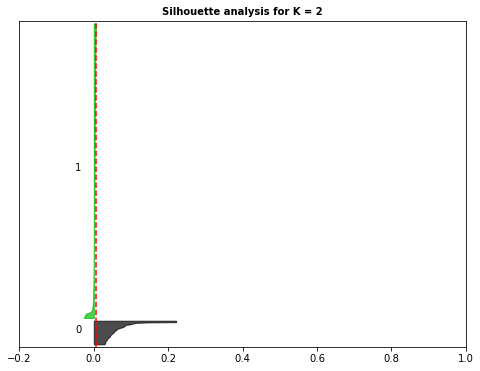

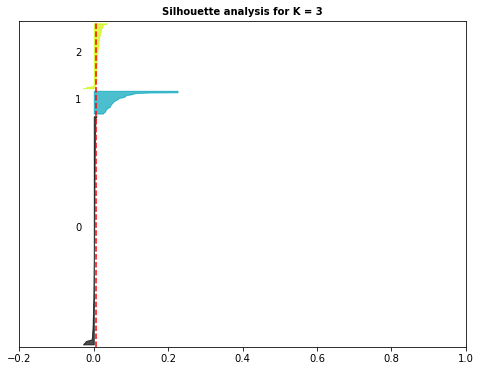

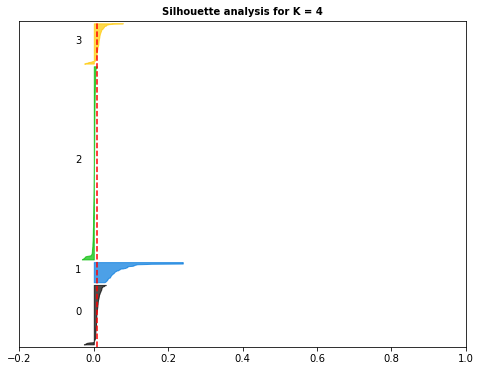

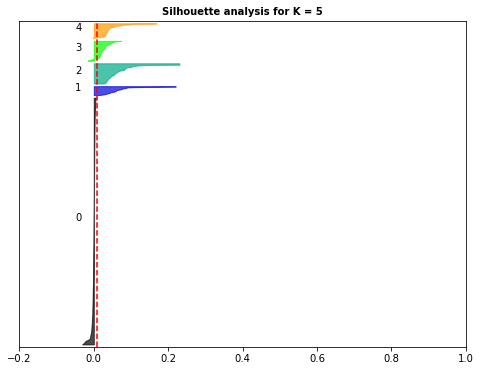

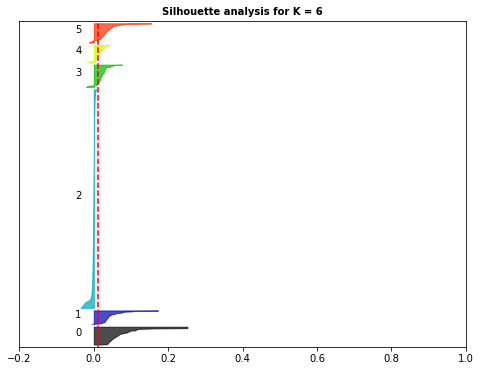

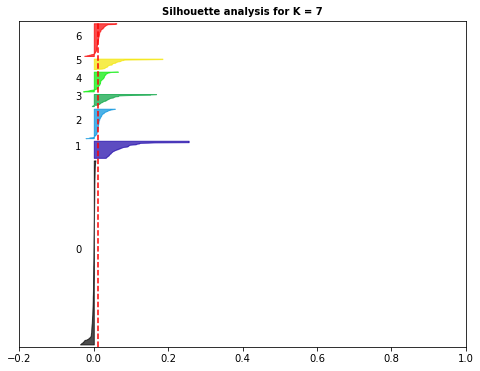

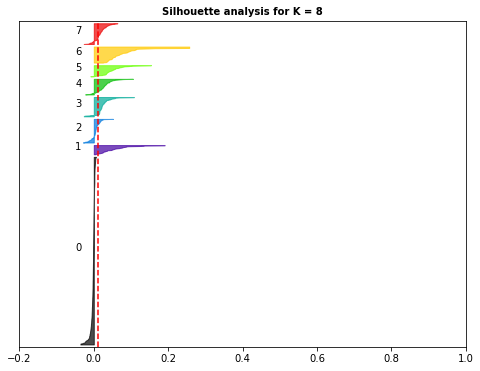

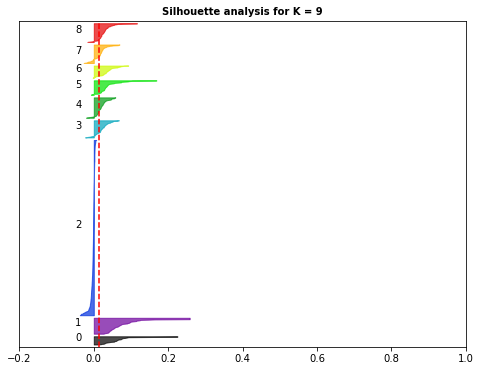

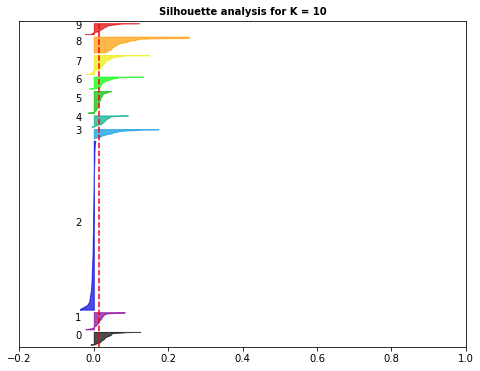

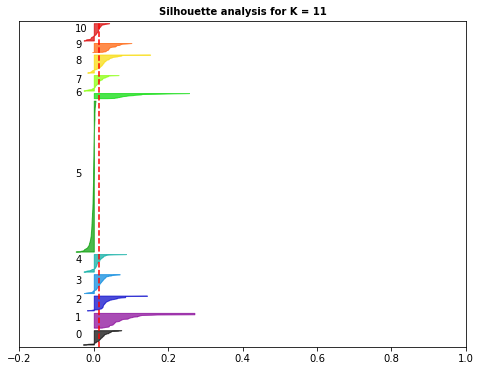

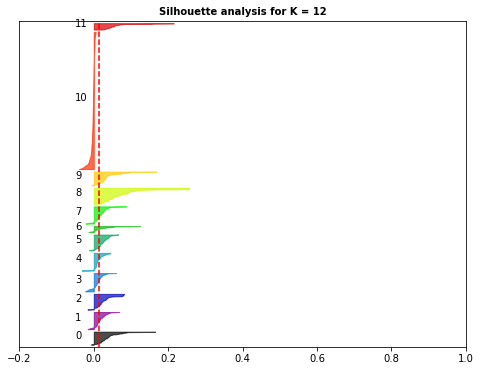

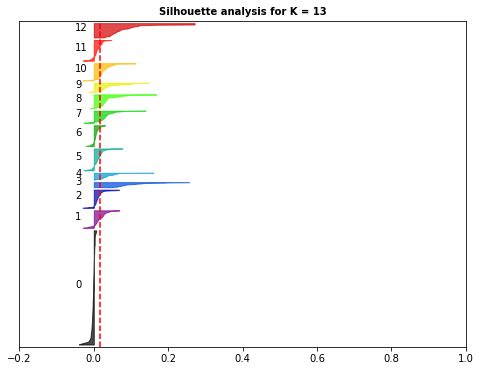

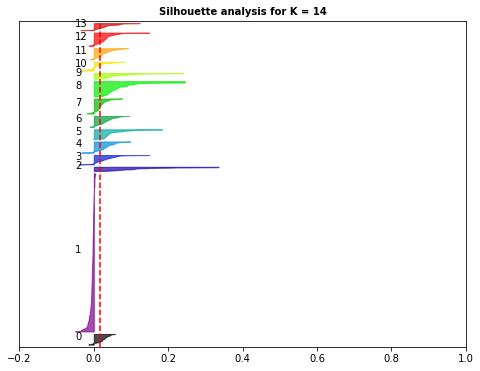

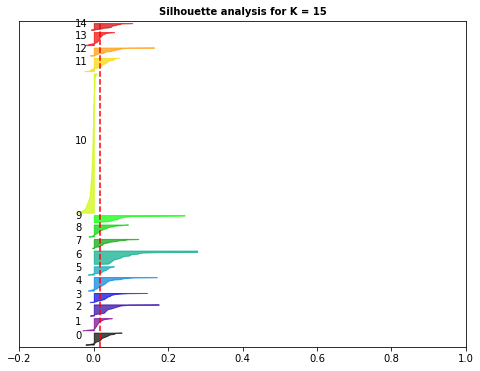

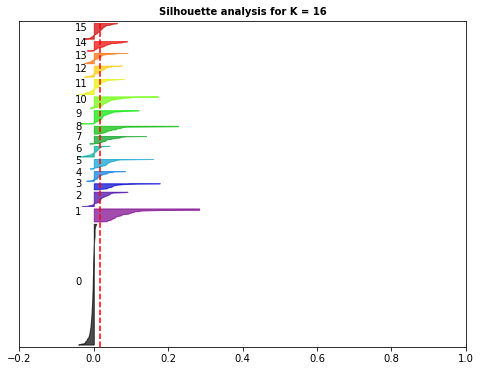

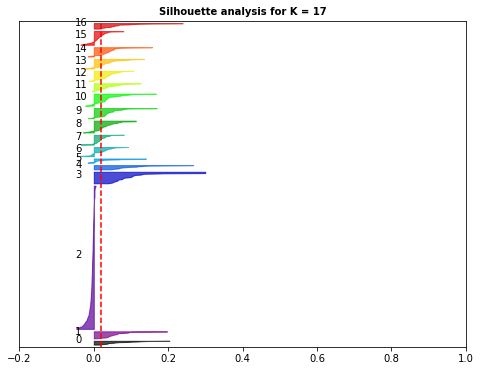

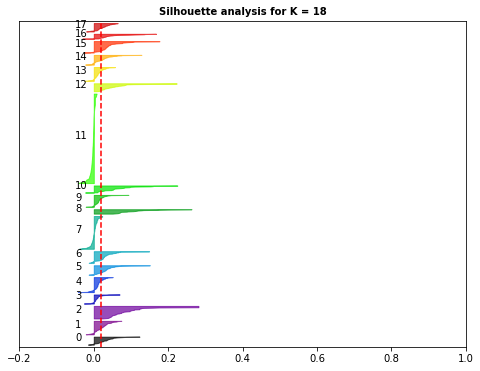

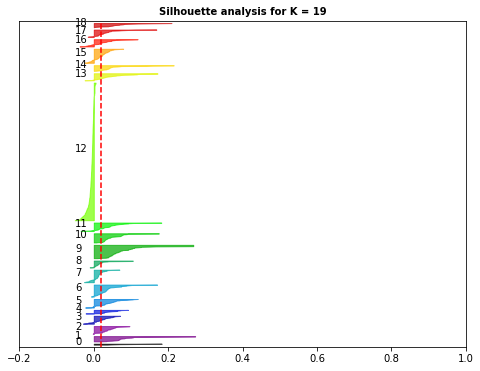

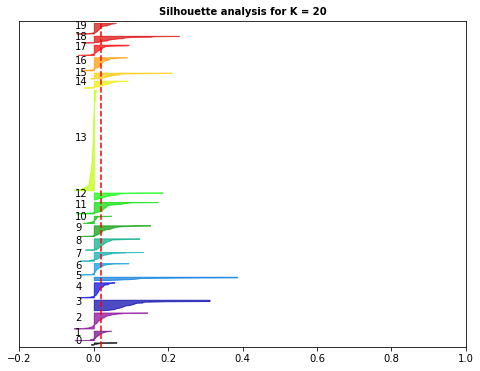

In [18]:
# # Running Kmeans
k = 20
kmeans_results = run_KMeans(k, final_df)

# # Plotting Silhouette Analysis
silhouette(kmeans_results, final_df, plot=True)

## Cluster Analysis

In [19]:
# kmeans = KMeans(n_clusters = 17, n_init = 20)
# kmeans.fit(X3)
# common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
# for num, centroid in enumerate(common_words):
#     print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

In [20]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

In [21]:
# kmeans.fit(X3)
# common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
# for num, centroid in enumerate(common_words):
#     print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

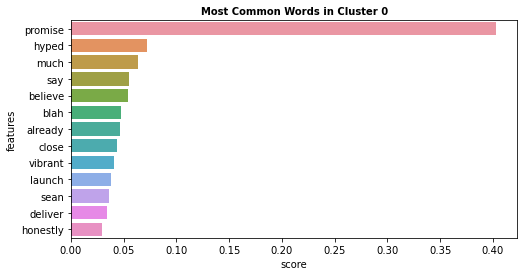

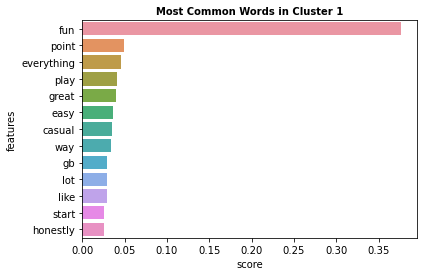

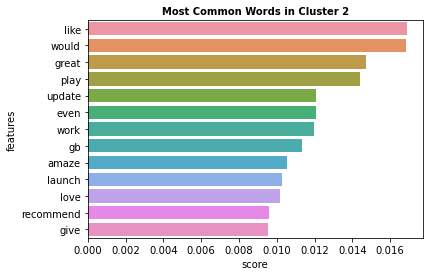

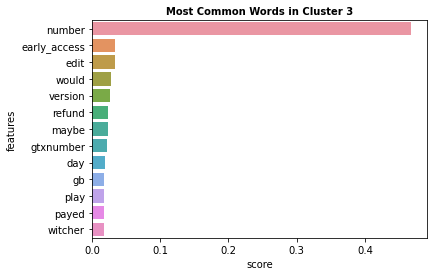

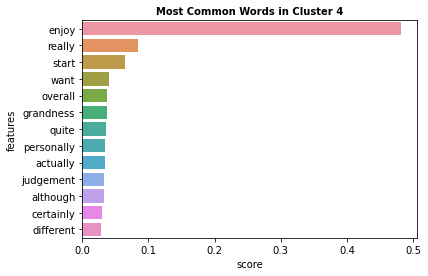

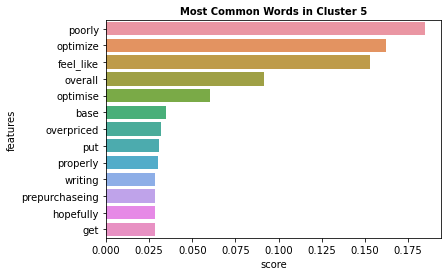

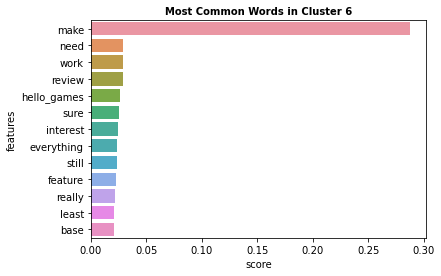

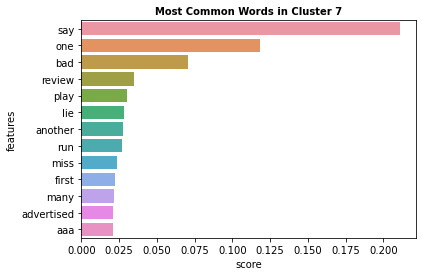

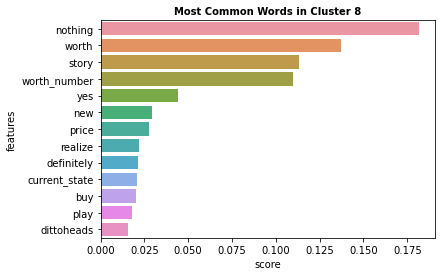

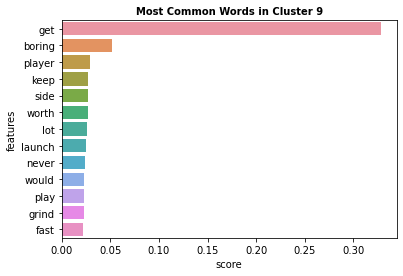

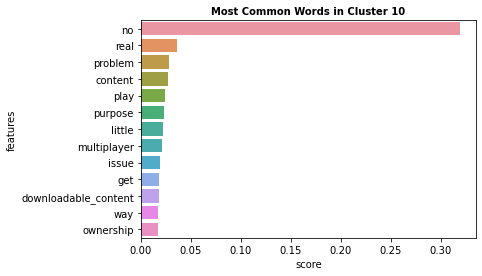

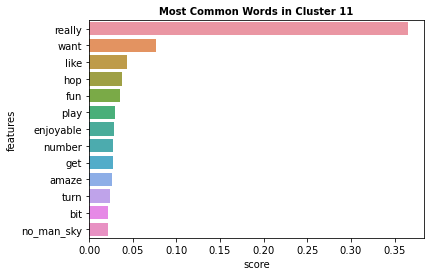

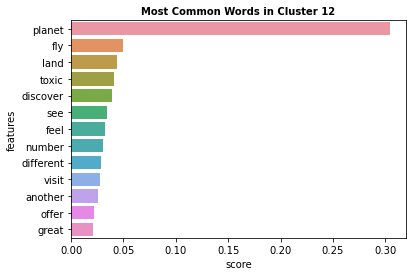

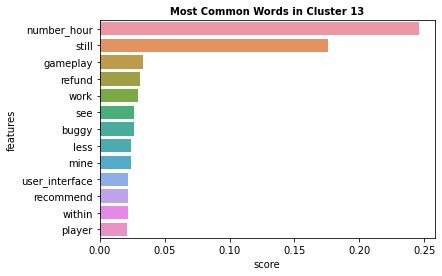

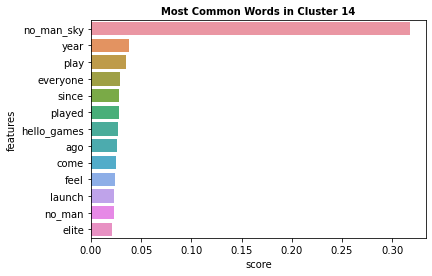

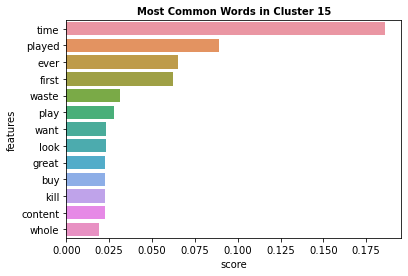

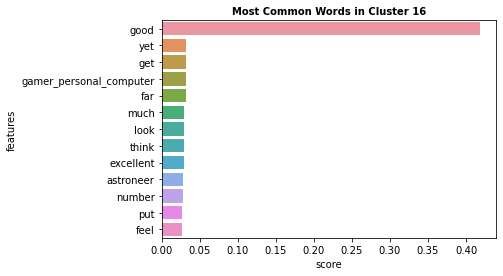

In [22]:
best_result = 17
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [23]:
labels = kmeans.labels_ 
data['label'] = labels
data

,Sent_id,No.,mongodb_id,content,recommend,sent_tokens,preprocessed_reviews_nm,correct,label
0,1,50,5f7db8d335b79a1eb9d208e2,\n\t\t\t\t\t\t\t\tYou literally do not have en...,True,You literally do not have enough time in your ...,"['literally', 'enough', 'time', 'life', 'explo...","['literally', 'enough', 'time', 'life', 'explo...",15
1,2,50,5f7db8d335b79a1eb9d208e2,\n\t\t\t\t\t\t\t\tYou literally do not have en...,True,"So, may as well make use of the time you've go...","['make', 'use', 'time', 'get', 'see']","['make', 'use', 'time', 'get', 'see']",6
2,3,68967,5f76e99dfbffba7b18adb94e,Game ran like crap at first but a patch less t...,True,Game ran like crap at first but a patch less t...,"['ran', 'like', 'crap', 'first', 'patch', 'les...","['ran', 'like', 'crap', 'first', 'patch', 'les...",13
3,4,68967,5f76e99dfbffba7b18adb94e,Game ran like crap at first but a patch less t...,True,No other developer can deliver patches that qu...,"['no', 'developer', 'deliver', 'patch', 'quick...","['no', 'developer', 'deliver', 'patch', 'quick...",10
4,5,68967,5f76e99dfbffba7b18adb94e,Game ran like crap at first but a patch less t...,True,"As far as the game goes, after almost 20 hours...","['far', 'go', 'almost', 'number_hour', 'still'...","['far', 'gb', 'almost', 'number_hour', 'still'...",13
...,...,...,...,...,...,...,...,...,...
1289,1290,93450,5f6e3571e9ecc48bee9a3dc1,\n\t\t\t\t\t\t\t\tNo Man's Sky had very many f...,False,No Man's Sky had very many features missing fr...,"['no_man_sky', 'many', 'feature', 'miss']","['no_man_sky', 'many', 'feature', 'miss']",14
1290,1291,93450,5f6e3571e9ecc48bee9a3dc1,\n\t\t\t\t\t\t\t\tNo Man's Sky had very many f...,False,planetary physicsship classes with meaningful ...,"['planetary', 'physicsship', 'class', 'meaning...","['planetary', 'physicsship', 'class', 'meaning...",2
1291,1292,93450,5f6e3571e9ecc48bee9a3dc1,\n\t\t\t\t\t\t\t\tNo Man's Sky had very many f...,False,atmosphere battlesNPCs outside trading posts a...,"['atmosphere', 'battlesnpcs', 'outside', 'trad...","['atmosphere', 'battlesnpcs', 'outside', 'trad...",2
1292,1293,93450,5f6e3571e9ecc48bee9a3dc1,\n\t\t\t\t\t\t\t\tNo Man's Sky had very many f...,False,99 and overall the naming of the game shows so...,"['number', 'overall', 'name', 'show', 'inaccur...","['number', 'overall', 'name', 'show', 'inaccur...",14


In [25]:
data.to_csv('./datasets/200_Kmeanslabelled_Method2_0811.csv',index=False)

## Map of Words

In [26]:
# Transforms a centroids dataframe into a dictionary to be used on a WordCloud.
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

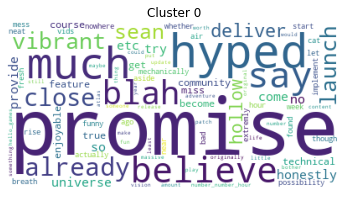

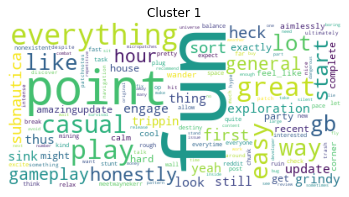

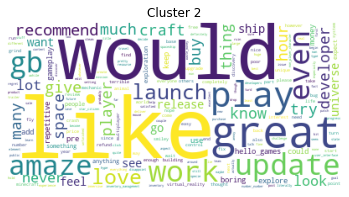

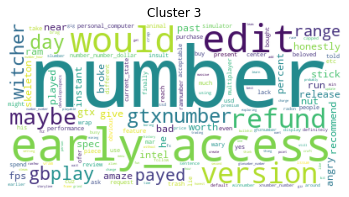

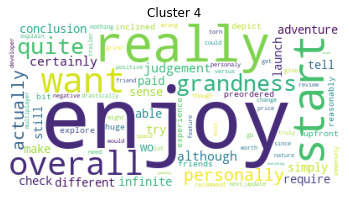

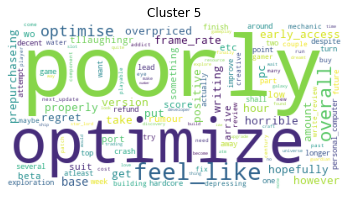

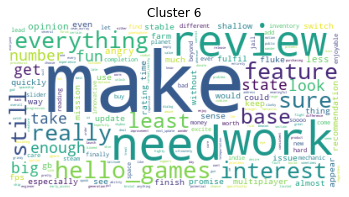

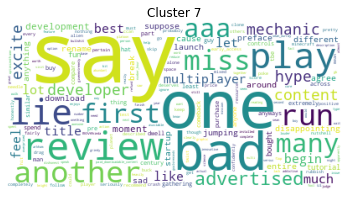

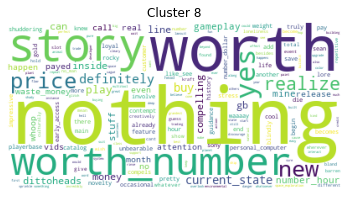

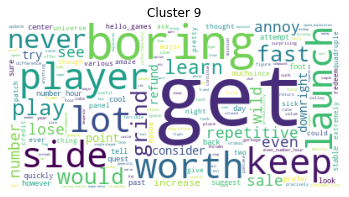

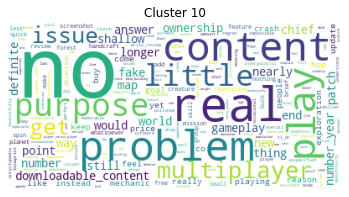

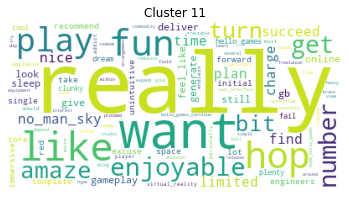

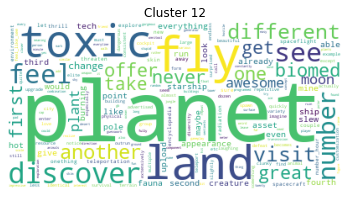

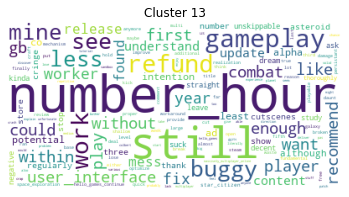

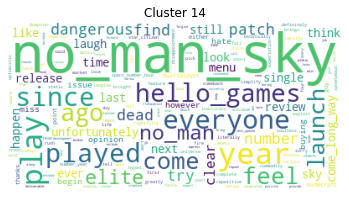

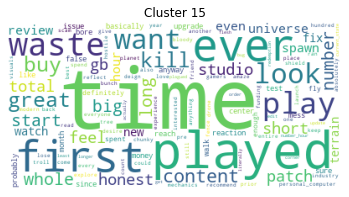

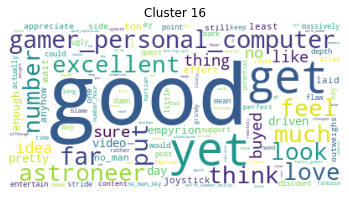

In [27]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [30]:
centroids.columns

Index(['aaa', 'abandon', 'ability', 'able', 'aboard', 'absent', 'absolute',
       'absolutely', 'abundant', 'abysmal',
       ...
       'wrong', 'xbox', 'xmas', 'xnumber_number', 'yeah', 'year', 'yes', 'yet',
       'youtube', 'zinc'],
      dtype='object', length=2120)

In [31]:
centroids.to_csv('./datasets/centroids.csv',index=False)